# Figures for Maaike Data
Dataset can be downloaded from https://www.ebi.ac.uk/pride/archive/projects/PXD010990 and paper from https://doi.org/10.1016/j.ccell.2018.09.009.

## Preparation

In [1]:
import os,csv,random
import pandas as pd
import numpy as np
import scanpy as sc
import math

from skimage import io, color
import torch

In [2]:
from scanpy import read_10x_h5
import SpaGCN as spg
import matplotlib.pyplot as plt
import json
from tqdm import tqdm
import pickle

In [3]:
from pyimzml.ImzMLParser import ImzMLParser
from pyimzml.metadata import Metadata

In [4]:
%cd /Users/anjideng1/Desktop/MALDI

/Users/anjideng1/Desktop/MALDI


In [5]:
import sys
sys.path.append('/Users/anjideng1/Desktop/MALDI/MALDI_package')

import MALDI_package as MALDIpy
MALDIpy.__version__

'1.0.0'

## Reading Data
import Ds1, (2), 3, 4, 18, 19, 20, 24, (26) (normal)

In [6]:
weekpoint1 = "5 wk regression"
weekpoint2 = "2 wk regression"

# compare within pos/neg group
# group = "9AA neg" 
group = "DHB pos"

DataDir = "data/Maaike"

In [7]:
MALDIdata1 = pd.read_csv("{DataDir}/{weekpoint} - {group} - All Spectra.csv".format(weekpoint = weekpoint1, DataDir = DataDir, group = group), sep =';') 
MALDIloc1 = pd.read_csv("{DataDir}/{weekpoint} - {group} - Region Spots.csv".format(weekpoint = weekpoint1, DataDir = DataDir, group = group), sep =';') 
MALDIdata2 = pd.read_csv("{DataDir}/{weekpoint} - {group} - All Spectra.csv".format(weekpoint = weekpoint2, DataDir = DataDir, group = group), sep =';') 
MALDIloc2 = pd.read_csv("{DataDir}/{weekpoint} - {group} - Region Spots.csv".format(weekpoint = weekpoint2, DataDir = DataDir, group = group), sep =';') 

In [8]:
mz_wk5 = pd.DataFrame(list(MALDIdata1.columns[1:]), index = list(MALDIdata1.columns[1:])).astype('float')
mz_wk5 = mz_wk5.rename(columns = {0:"m/z"})

mz_wk2 = pd.DataFrame(list(MALDIdata2.columns[1:]), index = list(MALDIdata2.columns[1:])).astype('float')
mz_wk2 = mz_wk2.rename(columns = {0:"m/z"})

In [9]:
# pandas.dataset.iloc(row, column) is used for retrive rows and columns from a dataset
MALDIdataAnn1 = sc.AnnData(X = MALDIdata1.iloc[:,1:], var = mz_wk5, obs = MALDIloc1)
MALDIdataAnn2 = sc.AnnData(X = MALDIdata2.iloc[:,1:], var = mz_wk2, obs = MALDIloc2)

/Users/anjideng1/anaconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/anjideng1/anaconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [10]:
sc.pp.normalize_per_cell(MALDIdataAnn1)
sc.pp.normalize_per_cell(MALDIdataAnn2)

## Plots of m/z shift

### Using code from MALDI package

In [11]:
PeakGroup = MALDIpy.PeakCallingmv(MALDIdataAnn1, MALDIdataAnn2)
PeakGroup.callpeak(0.9)
PeakGroup.grouppeaks(0.9)

In [12]:
ExactAlign = MALDIpy.AnnDataMALDI(MALDIdataAnn1, MALDIdataAnn2)
ExactAlign.get_corr_peakgroup_refined(PeakGroup.jointcluster)
ExactAlign.greedy_match()
ExactAlign.fine_align(threshould = 0.2, ignore = True)
ExactAlign.summarize()

100%|██████████| 198/198 [00:00<00:00, 536.09it/s]


In [13]:
## Shifting distribution plot
SD = MALDIpy.MALDI_SIM(ExactAlign)
file_loc = '/Users/anjideng1/Desktop/MALDI/'
SD.shiftdatadf.to_csv("output_Maaike/mzshifting.csv", sep = ",")

100%|██████████| 198/198 [00:00<00:00, 4696.28it/s]


### plot of m/z shift in m/z unit

In [118]:
Aligned = MALDIpy.PGmzalign(ExactAlign)
aligned_data = Aligned.getAnnSim()

100%|██████████| 198/198 [03:24<00:00,  1.03s/it]
/Users/anjideng1/anaconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [ ]:
df = Aligned.shiftdatadf

In [ ]:
Aligned.shiftplot_data()

In [ ]:
import anndata as ad
aligned_df = pd.DataFrame(df.X)

In [ ]:
SD.shiftdatadf.to_csv("output_Maaike/aligned.csv", sep = ",")

## Plots of Pearson's Coefficient

In [11]:
import seaborn as sns

In [12]:
PeakGroup = MALDIpy.PeakCallingmv(MALDIdataAnn1, MALDIdataAnn2)
PeakGroup.callpeak(0.9)
PeakGroup.grouppeaks(0.9)

In [13]:
ExactAlign = MALDIpy.AnnDataMALDI(MALDIdataAnn1, MALDIdataAnn2)
ExactAlign.get_corr_peakgroup_refined(PeakGroup.jointcluster)
ExactAlign.greedy_match()
ExactAlign.fine_align(threshould = 0.2, ignore = True)
ExactAlign.summarize()

100%|██████████| 198/198 [00:00<00:00, 599.56it/s]


In [14]:
# PeakGroup.jointcluster

In [15]:
# ExactAlign.PearsonMatrixFull

array([[ 0.97060678,  0.90942562,  0.40250444, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.05901371,  0.64803826,  0.89662052, ...,  0.        ,
         0.        ,  0.        ],
       [-0.07441865, -0.02830678,  0.60207736, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.91761399,
         0.13932657, -0.28950634],
       [ 0.        ,  0.        ,  0.        , ...,  0.59449704,
         0.96127777,  0.06572845],
       [ 0.        ,  0.        ,  0.        , ..., -0.0726556 ,
         0.4905888 ,  0.89573175]])

In [15]:
num_rows, num_columns = ExactAlign.PearsonMatrixFull.shape
num_rows
num_columns

1782

In [16]:
ExactAlign.nclusters

198

In [17]:
1782/198

9.0

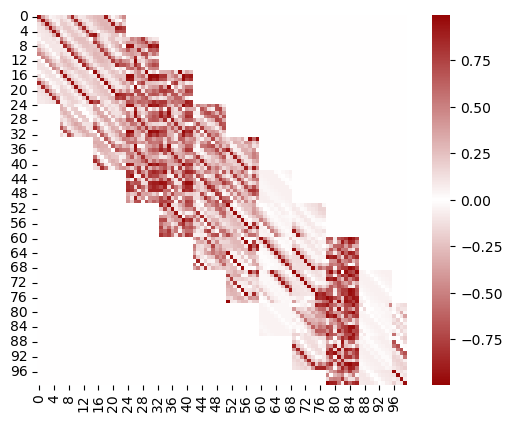

In [63]:
sns.heatmap(ExactAlign.PearsonMatrixFull[300:400, 300:400], cmap = custom_cmap, square = True)
plt.show()

## Anchor point 1

In [19]:
len(ExactAlign.aligned_mz_clusters_unk)
len(ExactAlign.aligned_mz_clusters_ref)
ExactAlign.nclusters

In [20]:
# df = ExactAlign.mz_valueUnk.iloc[ExactAlign.aligned_mz_clusters_unk[43]]
43*9

387

In [30]:
# ExactAlign.aligned_mz_clusters_ref[43]

In [31]:
PeakGroup.mz_valueUnk_mv.iloc[1464]
# MALDIdataAnn1.var.iloc[1465]

m/z    195.050552
Name: 195.05055236816, dtype: float64

In [32]:
PeakGroup.peakUnk[1464]

True

In [18]:
# PeakGroup.clusterUnk[31]

In [29]:
PeakGroup.mz_valueRef_mv.iloc[1489]
# MALDIdataAnn1.var.iloc[1465]

m/z    194.946182
Name: 194.94618225098, dtype: float64

In [20]:
PeakGroup.peakRef[1489]

False

In [17]:
# PeakGroup.clusterRef[27]

In [159]:
len(ExactAlign.meanspectrumUnk)

8000

In [18]:
ExactAlign.unk_clusters[43][52]

'195.05055236816'

In [22]:
len(ExactAlign.ref_clusters[43])

118

In [203]:
ExactAlign.ref_clusters[43][52]

'194.94618225098'

In [204]:
len(PeakGroup.clusterRef)

160

In [18]:
ExactAlign.unk_clusters[43][48:57]

Index(['194.54528808594', '194.67161560059', '194.79792785645',
       '194.9242401123', '195.05055236816', '195.17686462402',
       '195.30317687988', '195.42948913574', '195.55581665039'],
      dtype='object')

In [23]:
len(ExactAlign.unk_clusters[43])

118

In [40]:
ExactAlign.unk_clusters[43]

Index(['188.48220825195', '188.60852050781', '188.73483276367',
       '188.86114501953', '188.98745727539', '189.11378479004',
       '189.2400970459', '189.36640930176', '189.49272155762',
       '189.61903381348',
       ...
       '202.1241607666', '202.25047302246', '202.37678527832',
       '202.50309753418', '202.62940979004', '202.7557220459',
       '202.88204956055', '203.00836181641', '203.13467407227',
       '203.26098632813'],
      dtype='object', length=118)

In [80]:
mz_wk2[1438:1556]

,m/z
188.49168395996,188.491684
188.6157989502,188.615799
188.73992919922,188.739929
188.86405944824,188.864059
188.98817443848,188.988174
...,...
202.51779174805,202.517792
202.64192199707,202.641922
202.76605224609,202.766052
202.89016723633,202.890167


In [23]:
ExactAlign.ref_clusters[42]

['187.7469329834', '187.87104797363', '187.99517822266', '188.11930847168']

In [39]:
ExactAlign.ref_clusters[43][48:57]

['194.44967651367',
 '194.5738067627',
 '194.69792175293',
 '194.82205200195',
 '194.94618225098',
 '195.07029724121',
 '195.19442749023',
 '195.31854248047',
 '195.44267272949']

In [52]:
ExactAlign.ref_clusters[44]

['203.63491821289',
 '203.75904846191',
 '203.88317871094',
 '204.00729370117',
 '204.1314239502',
 '204.25553894043',
 '204.37966918945',
 '204.50379943848',
 '204.62791442871',
 '204.75204467773',
 '204.87617492676',
 '205.00028991699',
 '205.12442016602',
 '205.24855041504',
 '205.37266540527',
 '205.4967956543',
 '205.62092590332',
 '205.74504089355',
 '205.86917114258',
 '205.9933013916',
 '206.11741638184',
 '206.24154663086',
 '206.36567687988',
 '206.48979187012']

In [54]:
ExactAlign.unk_clusters[43]

Index(['188.48220825195', '188.60852050781', '188.73483276367',
       '188.86114501953', '188.98745727539', '189.11378479004',
       '189.2400970459', '189.36640930176', '189.49272155762',
       '189.61903381348',
       ...
       '202.1241607666', '202.25047302246', '202.37678527832',
       '202.50309753418', '202.62940979004', '202.7557220459',
       '202.88204956055', '203.00836181641', '203.13467407227',
       '203.26098632813'],
      dtype='object', length=118)

In [19]:
43*9

387

In [32]:
# ExactAlign.mz_valueRef.iloc[ExactAlign.aligned_mz_clusters_ref[43]].iloc[48:57]
# mz_wk2.iloc[ExactAlign.aligned_mz_clusters_ref[43]].iloc[48:57]

In [31]:
# ExactAlign.mz_valueRef.iloc[ExactAlign.aligned_mz_clusters_ref[43]].iloc[48:57]
# mz_wk2.iloc[ExactAlign.aligned_mz_clusters_ref[43]].iloc[48:57]

In [33]:
#mz_wk5.iloc[ExactAlign.aligned_mz_clusters_unk[43]].iloc[48:57]

In [23]:
#ExactAlign.align_group

In [24]:
from matplotlib.colors import LinearSegmentedColormap

# Define RGB values (0 to 255) for the red color
red_rgb = (150, 5, 5)

# Convert RGB values to the range expected by Matplotlib (0 to 1)
red_color = tuple(component / 255.0 for component in red_rgb)

# Define a custom colormap
colors = [red_color, 
          (1, 1, 1), 
          red_color]  # Red to white to red
custom_cmap = LinearSegmentedColormap.from_list('custom_red_white_red', colors, N=256)

/var/folders/d7/m9p2b6151gq0xsqcd1hbfbgw0000gp/T/ipykernel_15962/1914601707.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(('R-4', '\n194.45', 'R-3', '\n194.57', 'R-2', '\n194.70',


[Text(0.0, 0, 'R-4'),
 Text(0.2, 0, '\n194.45'),
 Text(0.4, 0, 'R-3'),
 Text(0.6000000000000001, 0, '\n194.57'),
 Text(0.8, 0, 'R-2'),
 Text(1.0, 0, '\n194.70')]

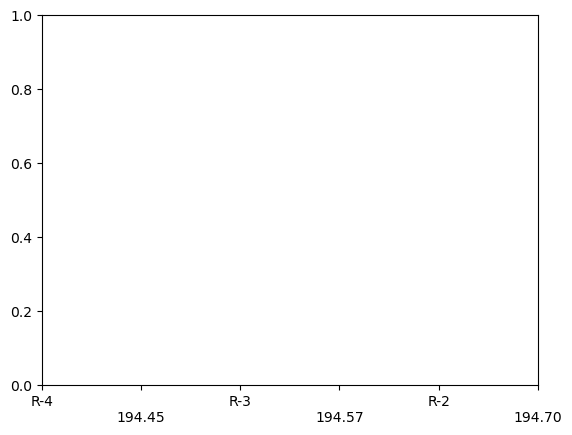

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)

y_labels = ['U-4', 'U-3', 'U-2', 'U-1', 'U0', 'U1', 'U2', 'U3', 'U4'] # reference or unknown?
x_labels = ['R-4', 'R-3', 'R-2', 'R-1', 'R0', 'R1', 'R2', 'R3', 'R4']

ax.set_xticklabels(('R-4', '\n194.45', 'R-3', '\n194.57', 'R-2', '\n194.70', 
                     'R-1', '\n194.82', 'R0', '\n194.95', 'R1', '\n195.07', 
                     'R2', '\n195.19', 'R3', '\n195.32', 'R4', '\n195.44'), 
                    ha='center')

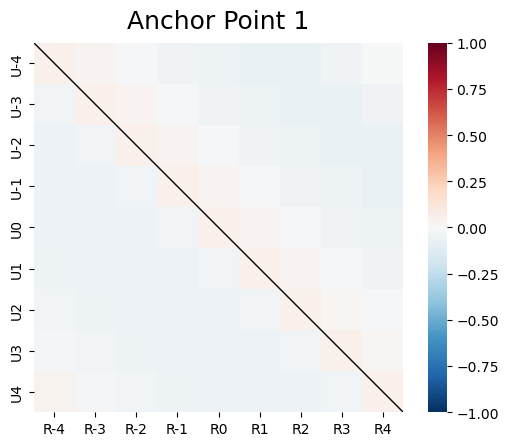

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

y_labels = ['U-4', 'U-3', 'U-2', 'U-1', 'U0', 'U1', 'U2', 'U3', 'U4'] # reference or unknown?
x_labels = ['R-4', 'R-3', 'R-2', 'R-1', 'R0', 'R1', 'R2', 'R3', 'R4']


#sns.heatmap(ExactAlign.PearsonMatrixFull[369:414, 369:414], cmap = 'RdBu', square = True,
#            xticklabels = x_labels, yticklabels = y_labels, vmin = -1, vmax = 1)# 387:396, 387:396

sns.heatmap(ExactAlign.PearsonMatrixFull[387:396, 387:396], cmap = 'RdBu_r', square = True,
            xticklabels = x_labels, yticklabels = y_labels, vmin = -1, vmax = 1)

# plt.xlabel('Reference', fontsize = 14)
# plt.ylabel('Unknown', fontsize = 14)
# 850 - 900, top left

# Create a y = -x line
x_values = np.arange(len(x_labels) + 1)
y_values = x_values
sns.lineplot(x = x_values, y = y_values, color = 'black', linestyle = '-', linewidth = 1)


plt.suptitle("Anchor Point 1", fontsize = 18, y = 0.95, x = 0.455)
plt.savefig('heatmap_anchor1.png', dpi=300)  # Adjust the filename and dpi as needed
plt.show()

In [75]:
ExactAlign.mz_valueUnk.iloc[ExactAlign.aligned_mz_clusters_unk[43]].iloc[52, ]

m/z    195.050552
Name: 195.05055236816, dtype: float64

In [94]:
ExactAlign.mz_valueRef.iloc[ExactAlign.aligned_mz_clusters_ref[43]].iloc[52, ]

m/z    194.946182
Name: 194.94618225098, dtype: float64

In [43]:
ExactAlign.PearsonMatrix

array([[0.95106266, 0.05527163, 0.05195211, ..., 0.        , 0.        ,
        0.        ],
       [0.05913712, 0.82460536, 0.32622979, ..., 0.        , 0.        ,
        0.        ],
       [0.05238448, 0.31122951, 0.93819716, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.80752368, 0.35490789,
        0.05732863],
       [0.        , 0.        , 0.        , ..., 0.30277332, 0.95311178,
        0.06049208],
       [0.        , 0.        , 0.        , ..., 0.05755434, 0.068453  ,
        0.90416069]])

In [48]:
ExactAlign.PearsonMatrix[43][43]

0.04613412762272011

In [49]:
ExactAlign.PearsonMatrixFull[43][43]

0.9597057981246273

In [76]:
ExactAlign.PearsonMatrixFull[387:396, 387:396]

array([[ 0.05114919,  0.02377311, -0.01445824, -0.04082486, -0.05166921,
        -0.06330346, -0.06408527, -0.04549263, -0.00085532],
       [-0.03567373,  0.05147686,  0.02401426, -0.01441515, -0.04091854,
        -0.05183917, -0.0634415 , -0.06411263, -0.04545991],
       [-0.06230238, -0.03535123,  0.05165662,  0.02399572, -0.01456632,
        -0.04115465, -0.0520505 , -0.06355482, -0.06416652],
       [-0.0619252 , -0.06195566, -0.0351343 ,  0.05164594,  0.02385493,
        -0.01479235, -0.04135838, -0.05215344, -0.06359859],
       [-0.0559017 , -0.06158794, -0.06174303, -0.03515902,  0.05149794,
         0.02362577, -0.01500427, -0.04147709, -0.0522141 ],
       [-0.04841507, -0.05553919, -0.06134643, -0.06174394, -0.03530318,
         0.05129356,  0.02344556, -0.01508971, -0.04150562],
       [-0.03428858, -0.04805679, -0.05530362, -0.06135482, -0.06190107,
        -0.03554009,  0.05111004,  0.02335523, -0.01512686],
       [-0.01656141, -0.03393639, -0.04782303, -0.0553104 , -0

In [79]:
diagnallist = [np.nanmean(np.diag(ExactAlign.PearsonMatrixFull[387:396, 387:396], k=i)) for i in range(-4,5)]
diagnallist = [-1 if value!=value else value for value in diagnallist]
diagnallist

[-0.05550392284238247,
 -0.061579176833588066,
 -0.06202015197504992,
 -0.03546825002796126,
 0.05131668945719262,
 0.023673377046482362,
 -0.014778985963054974,
 -0.04120652273439596,
 -0.05198528509411639]

In [80]:
max(diagnallist)

0.05131668945719262

## Anchor point2

In [29]:
# ExactAlign.mz_valueUnk.iloc[ExactAlign.aligned_mz_clusters_unk[60]]

In [106]:
# PeakGroup.jointcluster[46]
# 46*9

In [104]:
# ExactAlign.mz_valueRef.iloc[ExactAlign.aligned_mz_clusters_ref[60]][0:7]
mz_wk2.iloc[ExactAlign.aligned_mz_clusters_ref[60]][0:7]

,m/z
272.77252197266,272.772522
272.89663696289,272.896637
273.0207824707,273.020782
273.14489746094,273.144897
273.26901245117,273.269012
273.39315795898,273.393158
273.51727294922,273.517273


In [105]:
# ExactAlign.mz_valueUnk.iloc[ExactAlign.aligned_mz_clusters_unk[60]][0:7]
mz_wk5.iloc[ExactAlign.aligned_mz_clusters_unk[60]][0:7]

,m/z
272.73388671875,272.733887
272.86019897461,272.860199
272.98651123047,272.986511
273.11282348633,273.112823
273.23913574219,273.239136
273.36544799805,273.365448
273.49179077148,273.491791


In [131]:
# ExactAlign.unk_clusters[60]
# ExactAlign.ref_clusters[60]

In [138]:
PeakGroup.clusterRef[41]

[272.89663696289,
 273.0207824707,
 273.14489746094,
 273.39315795898,
 273.51727294922,
 273.8896484375,
 274.13787841797,
 274.88262939453,
 275.13088989258]

In [143]:
PeakGroup.clusterUnk[54]

[272.86019897461,
 272.98651123047,
 273.11282348633,
 273.23913574219,
 273.87072753906,
 274.12335205078,
 274.24966430664,
 274.88122558594,
 275.0075378418,
 275.13385009766,
 275.26019287109]

In [32]:
mz_wk2[2115:2500]

,m/z
272.52426147461,272.524261
272.64840698242,272.648407
272.77252197266,272.772522
272.89663696289,272.896637
273.0207824707,273.020782
...,...
319.69174194336,319.691742
319.81588745117,319.815887
319.94000244141,319.940002
320.06411743164,320.064117


In [42]:
mz_wk5[2077:2500]

,m/z
272.35494995117,272.354950
272.48126220703,272.481262
272.60757446289,272.607574
272.73388671875,272.733887
272.86019897461,272.860199
...,...
325.15435791016,325.154358
325.28067016602,325.280670
325.40698242188,325.406982
325.53329467773,325.533295


In [16]:
ExactAlign.ref_clusters[60]

['272.77252197266',
 '272.89663696289',
 '273.0207824707',
 '273.14489746094',
 '273.26901245117',
 '273.39315795898',
 '273.51727294922',
 '273.64138793945',
 '273.76553344727',
 '273.8896484375',
 '274.01376342773',
 '274.13787841797',
 '274.26202392578',
 '274.38613891602',
 '274.51025390625',
 '274.63439941406',
 '274.7585144043',
 '274.88262939453',
 '275.00677490234',
 '275.13088989258',
 '275.25500488281',
 '275.37915039063',
 '275.50326538086',
 '275.62738037109']

In [33]:
ExactAlign.unk_clusters[60]

Index(['272.73388671875', '272.86019897461', '272.98651123047',
       '273.11282348633', '273.23913574219', '273.36544799805',
       '273.49179077148', '273.61810302734', '273.7444152832',
       '273.87072753906', '273.99703979492', '274.12335205078',
       '274.24966430664', '274.3759765625', '274.50228881836',
       '274.62860107422', '274.75491333008', '274.88122558594',
       '275.0075378418', '275.13385009766', '275.26019287109',
       '275.38650512695', '275.51281738281', '275.63912963867'],
      dtype='object')

In [57]:
ExactAlign.PearsonMatrixFull[540:549, 540:549]

array([[ 0.77873568,  0.02264982,  0.04898226, -0.03668617, -0.09714109,
        -0.12088989, -0.12522331,  0.30482223,  0.49092969],
       [ 0.56900423,  0.77851159,  0.0227847 ,  0.05005548, -0.03575548,
        -0.09606375, -0.11835625, -0.18786525,  0.32762895],
       [-0.12141294,  0.56865917,  0.77828647,  0.02352275,  0.05052802,
        -0.03514768, -0.09388563, -0.12499561, -0.16561898],
       [-0.1458955 , -0.12238607,  0.56825101,  0.77837192,  0.02349653,
         0.05057883, -0.03358151, -0.00729888, -0.102569  ],
       [-0.12492863, -0.14620513, -0.12257012,  0.56858713,  0.77842949,
         0.0241696 ,  0.0525928 ,  0.24384962,  0.01581334],
       [-0.10738325, -0.12532412, -0.1464919 , -0.12176597,  0.56876919,
         0.77852704,  0.02601339,  0.59505867,  0.26648527],
       [-0.09641424, -0.10754332, -0.12537248, -0.14553583, -0.12106878,
         0.56907836,  0.77898389,  0.43491594,  0.61679902],
       [-0.07902987, -0.05345769, -0.06461569, -0.09675596, -0

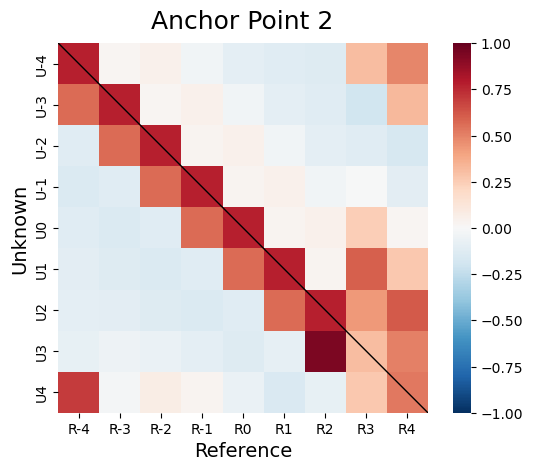

In [17]:
y_labels = ['U-4', 'U-3', 'U-2', 'U-1', 'U0', 'U1', 'U2', 'U3', 'U4']
x_labels = ['R-4', 'R-3', 'R-2', 'R-1', 'R0', 'R1', 'R2', 'R3', 'R4']

sns.heatmap(ExactAlign.PearsonMatrixFull[540:549, 540:549], cmap = 'RdBu_r', square = True,
            xticklabels = x_labels, yticklabels = y_labels, vmin = -1, vmax = 1) # 405:414

plt.xlabel('Reference', fontsize = 14)
plt.ylabel('Unknown', fontsize = 14)

sns.lineplot(x = x_values, y = y_values, color = 'black', linestyle = '-', linewidth = 1)
plt.suptitle("Anchor Point 2", fontsize = 18, y = 0.95, x = 0.455)
plt.savefig('heatmap_anchor2.png', dpi=300)
plt.show()
# 50 - 100: top left

## Anchor point 3

In [32]:
# ExactAlign.mz_valueRef.iloc[ExactAlign.aligned_mz_clusters_ref[157]]
157*9

1413

In [57]:
PeakGroup.jointcluster[115]
115*9

1035

In [74]:
ExactAlign.mz_valueRef.iloc[ExactAlign.aligned_mz_clusters_ref[157]][0:8]

,m/z
676.67510986328,676.675110
676.79925537109,676.799255
676.92333984375,676.923340
677.04748535156,677.047485
677.17163085938,677.171631
677.29571533203,677.295715
677.41986083984,677.419861
677.54400634766,677.544006


In [84]:
ExactAlign.aligned_mz_clusters_ref[157]

array([5371, 5372, 5373, 5374, 5375, 5376, 5377, 5378, 5379, 5380, 5381,
       5382, 5383, 5384, 5385])

In [103]:
mz_wk2.iloc[ExactAlign.aligned_mz_clusters_ref[157]][0:8]

,m/z
676.67510986328,676.675110
676.79925537109,676.799255
676.92333984375,676.923340
677.04748535156,677.047485
677.17163085938,677.171631
677.29571533203,677.295715
677.41986083984,677.419861
677.54400634766,677.544006


In [97]:
mz_wk5.iloc[ExactAlign.aligned_mz_clusters_ref[153]][0:8]

,m/z
676.68725585938,676.687256
676.81353759766,676.813538
676.93988037109,676.939880
677.06616210938,677.066162
677.19250488281,677.192505
677.31884765625,677.318848
677.44512939453,677.445129
677.57147216797,677.571472


In [62]:
ExactAlign.mz_valueUnk.iloc[ExactAlign.aligned_mz_clusters_unk[157]][0:8]

,m/z
676.68725585938,676.687256
676.81353759766,676.813538
676.93988037109,676.939880
677.06616210938,677.066162
677.19250488281,677.192505
677.31884765625,677.318848
677.44512939453,677.445129
677.57147216797,677.571472


In [133]:
# ExactAlign.ref_clusters[157]
# ExactAlign.unk_clusters[157]

In [36]:
PeakGroup.clusterUnk[143]

[676.81353759766,
 676.93988037109,
 677.06616210938,
 677.19250488281,
 677.31884765625,
 677.95037841797,
 678.20300292969,
 678.32934570313]

In [37]:
PeakGroup.clusterRef[107]

[676.79925537109,
 676.92333984375,
 677.04748535156,
 677.17163085938,
 677.29571533203,
 677.91638183594,
 678.16461181641,
 678.28875732422]

In [60]:
mz_wk2[5370:6600]

,m/z
676.55096435547,676.550964
676.67510986328,676.675110
676.79925537109,676.799255
676.92333984375,676.923340
677.04748535156,677.047485
...,...
828.60406494141,828.604065
828.72814941406,828.728149
828.85229492188,828.852295
828.97644042969,828.976440


In [34]:
ExactAlign.ref_clusters[157]

['676.67510986328',
 '676.79925537109',
 '676.92333984375',
 '677.04748535156',
 '677.17163085938',
 '677.29571533203',
 '677.41986083984',
 '677.54400634766',
 '677.66809082031',
 '677.79223632813',
 '677.91638183594',
 '678.04046630859',
 '678.16461181641',
 '678.28875732422',
 '678.41284179688']

In [48]:
ExactAlign.unk_clusters[157]

Index(['676.68725585938', '676.81353759766', '676.93988037109',
       '677.06616210938', '677.19250488281', '677.31884765625',
       '677.44512939453', '677.57147216797', '677.69775390625',
       '677.82409667969', '677.95037841797', '678.07672119141',
       '678.20300292969', '678.32934570313', '678.45562744141'],
      dtype='object')

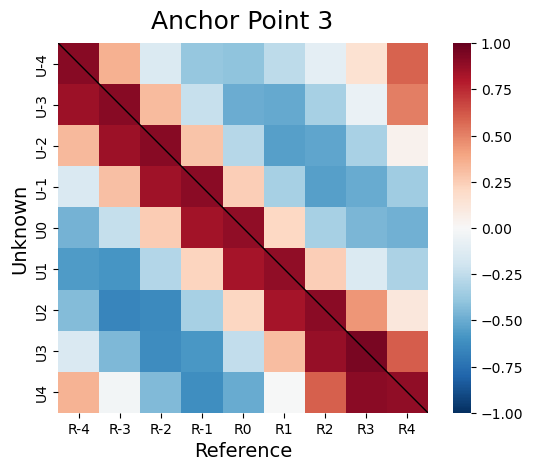

In [18]:
y_labels = ['U-4', 'U-3', 'U-2', 'U-1', 'U0', 'U1', 'U2', 'U3', 'U4']
x_labels = ['R-4', 'R-3', 'R-2', 'R-1', 'R0', 'R1', 'R2', 'R3', 'R4']

sns.heatmap(ExactAlign.PearsonMatrixFull[1413:1422, 1413:1422], cmap = 'RdBu_r', square = True,
            xticklabels = x_labels, yticklabels = y_labels, vmin = -1, vmax = 1) # 1026:1035

plt.xlabel('Reference', fontsize = 14)
plt.ylabel('Unknown', fontsize = 14)

sns.lineplot(x = x_values, y = y_values, color = 'black', linestyle = '-', linewidth = 1)
plt.suptitle("Anchor Point 3", fontsize = 18, y = 0.95, x = 0.455)
plt.savefig('heatmap_anchor3.png', dpi=300)
plt.show()
# 10 - 60: left bottom

### Spectrum plot

In [14]:
PeakGroup = MALDIpy.PeakCallingmv(MALDIdataAnn1, MALDIdataAnn2)
PeakGroup.callpeak(0.9)
PeakGroup.grouppeaks(0.9)

In [15]:
ExactAlign = MALDIpy.AnnDataMALDI(MALDIdataAnn1, MALDIdataAnn2)
ExactAlign.get_corr_peakgroup_refined(PeakGroup.jointcluster)
ExactAlign.greedy_match()
ExactAlign.fine_align(threshould = 0.2, ignore = True)
ExactAlign.summarize()

100%|██████████| 198/198 [00:00<00:00, 612.90it/s]


In [18]:
Aligned = MALDIpy.PGmzalign(ExactAlign)
MALDIdataAnn3 = Aligned.getAnnSim()

100%|██████████| 198/198 [02:23<00:00,  1.38it/s]
/Users/anjideng1/anaconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [19]:
sc.pp.normalize_per_cell(MALDIdataAnn3)

In [20]:
meanspectrum_aligned = np.mean(MALDIdataAnn3.X, axis = 0)
meanspectrum_aligned_mv = np.convolve(meanspectrum_aligned, np.ones(3)/3, mode='valid')

In [21]:
mz_aligned = MALDIdataAnn3.var

In [22]:
mz_aligned_mv = mz_aligned[1:(mz_aligned.shape[0]-1)]
mz_aligned_mv 

,m/z
10.124124526978,10.124125
10.248250007629,10.248250
10.372374534607,10.372375
10.496500015259,10.496500
10.620624542236,10.620625
...,...
1002.2548217773,1002.254822
1002.3789672852,1002.378967
1002.503112793,1002.503113
1002.6271972656,1002.627197


In [26]:
originaltable= pd.DataFrame(np.array(mz_aligned_mv["m/z"]))
originaltable = originaltable.rename(columns = {0:"mzaligned"})

In [28]:
meanspectrum_aligned_mv

array([1.08459336, 1.08432467, 1.08429739, ..., 1.08774044, 1.08787319,
       1.08856399])

In [54]:
originaltable= pd.DataFrame(np.array(mz_aligned_mv["m/z"]))
originaltable = originaltable.rename(columns = {0:"mzaligned"})
originaltable["intensityaligned"] = meanspectrum_aligned_mv
originaltable

,mzaligned,intensityaligned
0,10.124125,1.084593
1,10.248250,1.084325
2,10.372375,1.084297
3,10.496500,1.084032
4,10.620625,1.084164
...,...,...
7993,1002.254822,1.090331
7994,1002.378967,1.089595
7995,1002.503113,1.087740
7996,1002.627197,1.087873


In [55]:
csv_file_path = '/Users/anjideng1/Desktop/MALDI/output_Maaike'
originaltable.to_csv (csv_file_path + "/mean_spec_mv_aligned.csv")